# 변수선택법 / 모델선택법
### 모델선택(변수선택)
- 변수가 여러 개일 때, 최적의 변수 조합을 찾아내는 기법
- 변수가 p개일 때, 변수의 총 조합은 2 ** p으로 변수 수가 증가함에 따라 변수 조합의 수는 기하급수 적으로 증가.
- 총 변수들의 조합 중 최적의 조합을 찾기 위한 차선의 방법
- optimal은 아님, optimal한 조합을 찾는 방법은 모든 경우의 수 조합을 다 해보는 것
    - 1) Feedforward Selection 방법
    - 2) Backward Elimination 방법
    - 3) Stepwise 방법

### Feedforward Selection 
- 변수를 추가해가며 성능지표를 비교해가는 방법

### Backward Elimination 방법 
- 변수를 제거해가며 성능지표를 비교해가는 방법

### Stepwise 방법 :
- 가장 유의한 변수를 추가하거나 유의하지 않는 변수를 제거해나가는 방법
- 전진선택법을 사용할 때 한 변수가 선택되면 이미 선택된 변수 중 중요하지 않은 변수가 있을 수 있음.
- 전진선택법의 각 단계에서 이미 선택된 변수들의 중요도를 다시 검사하여 중요하지 않은 변수를 제거하는 방법
- 일반적으로 가장 널리 쓰이는 방법
    - 1) 변수 입력/제거를 위한 p-value 임계치 설정
    - 2) Forward selection을 통한 변수 설정
    - 3) 선택된 변수 중 유의미한 변수를 남기고 제거, 2-3번 반복
    - 4) 변수가 추가되거나 제거할 케이스가 없는 경우 종료

# 교호작용
- 변수간의 시너지 효과
    > X1과 X2는 Y에 영향을 끼치지는 않지만, X1과 X2가 결합됨으로써 Y에 중요한 영향을 끼칠 수 있음.
<br>
- 교호작용은 일반적으로 도메인지식에 근거하여 추가하여야함.

- 명목형 변수(Dummy variable)
    - 성별, 대학, 지역 등 명목형 변수의 경우 전처리가 필요함.
        > X(학력)와 Y(수입)의 관계

# 회귀분석의 진단
- 적절한 변수를 통해 어느 정도 성능지표가 잘 나오는 모델을 만들었을 때,
- 과연 이 회귀모델이 잘 만들어진 모델인것인가에 대한 진단 필요.
- 회귀분석에서는 잔차에 대한 세 가지 가정이 존재 : 정규성, 독립성, 등분산성
- 위 세 가지 가정들을 만족할 시 잘 만들어진 모델이라고 판단.
- 회귀모델을 잘 만들었을 경우, 잔차는 정규분포를 따른다.
        > 잔차 : 실제값 - 예측값

### 회귀분석의 가정
- X와 Y는 선형관계이다
- Y는 정규분포를 따른다
- 잔차들이 평균이 0인 표준정규분포를 따른다.

- 정규성, 독립성, 등분산성은 일반적으로 Residuals 산점도, Normal Q-Q Plot과 Residual vs fitted plot으로 진단.

### 잔차가 가정에 위배된 경우
- 1) Y에 대하여 log 또는 root를 씌워줌.
- 2) 이상치 제거
- 3) 다항회귀분석(비선형회귀 적합시키기)

# 다항회귀분석 (Polynomial regression)
- 이차항 이상의 비선형회귀모델

### 다항회귀분석이 필요한 경우
- 독립변수와 종속변수 간의 비선형관계를 가질 경우
    > 독립변수와 종속변수의 Plot을 통해 확인 가능

- 다중 회귀의 가정이 위배된 경우
    > Residual Plot을 통해 확인 가능

### 다항회귀 적합
- 회귀 계수를 추정하는 방법은 선형회귀분석과 동일하게 잔차제곱합을 최소화시키도록 회귀계수 추정
- 기존의 변수에 2차항을 추가한 모델 vs 2차항만을 사용한 모델

    > X.1과 Y와의 관계가 2차식 같은 비선형이라면, 2차항만 고려하는 게 일반적.
    
- 다항회귀 시 고려할 것
    > 항이 추가될 수록 overfitting이 일어날 가능성이 크기 때문에 고차항 추가 시 신중해야함.

# 변수 선택법에 의한 다항회귀분석 실습
### 도요타 자동차 가격

In [2]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [5]:
# 데이터 불러오기
corolla = pd.read_csv('./data/ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
# 데아터 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


### 범주형 변수를 이진형 변수로 변환

In [9]:
# 가변수 생성
corolla.Fuel_Type.unique()
# 명목형변수 처리에는 Factor - 1 만큼 필요. 즉, 2개 필요
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [10]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
# 패트롤, CNG, Diesel이 있는 곳에 1값 넣기
p_idx = np.array(corolla.Fuel_Type == 'Petrol')
d_idx = np.array(corolla.Fuel_Type == 'Diesel')
c_idx = np.array(corolla.Fuel_Type == 'CNG')

In [13]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [14]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

### 불필요한 변수 제거 및 가변수 추가

In [18]:
Fuel = pd.DataFrame({'Petrol' : dummy_p, 'Diesel' : dummy_d, 'CNG' : dummy_c})
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [20]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis=1, inplace=False)
mir_data = pd.concat((corolla_, Fuel), 1)

In [22]:
mir_data.head() # 기존의 Fuel_Type 대신 CNG, Diesel 등 새로운 변수 생성

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [24]:
# bias(상수항) 추가
mir_data = sm.add_constant(mir_data, has_constant='add')
mir_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


### 설명변수(X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [26]:
feature_columns = list(mir_data.columns.difference(['Price']))

In [27]:
feature_columns = list(mir_data.columns.difference(['Price']))

X = mir_data[feature_columns]
y = mir_data.Price
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1005, 37) (1005,) (431, 37) (431,)


In [28]:
# Train the MLR / 회귀모델 적합
full_model = sm.OLS(train_y, train_X)
fitted_full_model = full_model.fit()

In [29]:
# R스퀘어가 높고 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     298.0
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:07:01   Log-Likelihood:                -8465.0
No. Observations:                1005   AIC:                         1.700e+04
Df Residuals:                     971   BIC:                         1.717e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -206.0040    136.681     -1.507      0.132    -474.228      62.220
Age_08_04         -120.1719      4.102    -29.296      0.000    -128.222    -112.122
Airbag_1           199.9815    266.793      0.750      0.454    -323.576     723.539
Airbag_2           -74.4818    141.632     -0.526      0.599    -352.422     203.458
Airco              203.9530     97.284      2.096      0.036      13.041     394.865
Automatic          319.4262    166.276      1.921      0.055      -6.875     645.728
Automatic_airco   2631.6868    196.428     13.398      0.000    2246.215    3017.158
BOVAG_Guarantee    390.5677    142.978      2.732      0.006     109.986     671.149
Backseat_Divider  -281.3734    137.530     -2.046      0.041    -551.265     -11.482
Boardcomputer     -196.5515    122.567     -1.604      0.109    -437.078      43.975
CD_Player          196.9906    106.065      1.857      0.064     -11.153     405.135
CNG              -1052.8873    242.385     -4.344      0.000   -1528.547    -577.228
Central_Lock      -188.9307    156.649     -1.206      0.228    -496.341     118.480
Cylinders           -0.0303      0.002    -12.552      0.000      -0.035      -0.026
Diesel             288.7409    194.276      1.486      0.138     -92.509     669.990
Doors               68.8476     43.023      1.600      0.110     -15.581     153.276
Gears               51.4946    241.713      0.213      0.831    -422.846     525.835
Guarantee_Period    54.9549     14.239      3.860      0.000      27.013      82.897
HP                  23.7764      3.595      6.613      0.000      16.721      30.832
KM                  -0.0155      0.001    -11.386      0.000      -0.018      -0.013
Met_Color          -11.7434     80.092     -0.147      0.883    -168.917     145.431
Metallic_Rim       223.0739    102.415      2.178      0.030      22.094     424.054
Mfg_Month          -91.5089     10.890     -8.403      0.000    -112.879     -70.139
Mfg_Year             2.4398      0.902      2.703      0.007       0.669       4.211
Mfr_Guarantee      232.9113     78.297      2.975      0.003      79.261     386.562
Mistlamps          -26.3744    116.467     -0.226      0.821    -254.931     202.182
Petrol             764.1388    215.913      3.539      0.000     340.430    1187.848
Power_Steering     -19.9058    284.745     -0.070      0.944    -578.692     538.880
Powered_Windows    502.4016    158.178      3.176      0.002     191.992     812.811
Quarterly_Tax       11.8389      2.121      5.581      0.000       7.676      16.002
Radio              728.9624    814.184      0.895      0.371    -868.800    2326.725
Radio_cassette    -898.1548    815.227     -1.102      0.271   -2497.965     701.656
Sport_Model        353.5273     93.508      3.781      0.000     170.026     537.028
Tow_Bar           -206.

### VIF를 통한 다중공선성 확인

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(
mir_data.values, i) for i in range(mir_data.shape[1])]
vif['features'] = mir_data.columns
vif

/Users/hyunsoolee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/hyunsoolee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


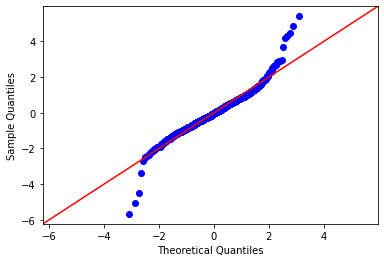

In [31]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid

# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

- y = x의 모습을 보여야 정규성을 띄나, 꼬리 부분에 있어 몇 개 그렇지 않은 모습 보임.

Text(0, 0.5, 'Residual')

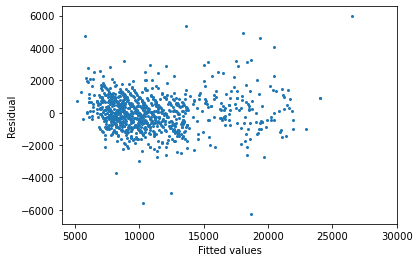

In [33]:
# residual pattern 확인 - 잔차의 균등성 확인
pred_y = fitted_full_model.predict(train_X)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [44]:
# 검증 데이터에 대한 예측

pred_y2 = fitted_full_model.predict(test_X)

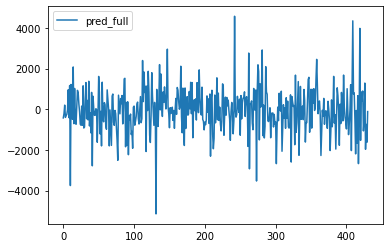

In [50]:
# 잔차 Plot
plt.plot(np.array(test_y - pred_y2), label='pred_full')
plt.legend()
plt.show()

- 검증데이터에 대해 잘 맞지 않는 그래프를 보임.

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
# MSE 성능
mean_squared_error(y_true = test_y, y_pred = pred_y2)

1236156.9886113473

### 변수선택법

In [52]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)]) # Modeling
    regr = model.fit() # 모델 학습
    AIC = regr.aic # 모델의 AIC
    return {"model" : regr, "AIC" : AIC}

print(processSubset(X=train_X, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8af1157af0>, 'AIC': 19112.595153121314}


In [53]:
processSubset(X=train_X, y=train_y, feature_set = feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f8af1171130>,
 'AIC': 16998.089540346053}

- 모든 모델을 조합해서 가장 좋은 모델을 반환시키는 함수

In [55]:
import time
import itertools
# getBest : 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X, y, k): # k = 변수의 수
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수 조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo)) # 모델링된 것들을 저장
    models=pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index # AIC가 가장 낮은 모델
    toc = time.time() # 종료 시간
    print('Processed', models.shape[0], 'models on', k, 'predictors in', (toc - tic), 'seconds.')
    return best_model

print(getBest(X=train_X, y=train_y, k=2))

Processed 630 models on 2 predictors in 0.4559617042541504 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17467.5
Name: 211, dtype: object


In [56]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo) + ['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [58]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1, 4):
    models.loc[i] = getBest(X=train_X, y=train_y, k=i)
toc = time.time()
print('Total elapsed time:', (toc-tic), 'seconds.')

Processed 36 models on 1 predictors in 0.05468583106994629 seconds.
Processed 630 models on 2 predictors in 0.4266510009765625 seconds.
Processed 7140 models on 3 predictors in 5.612871885299683 seconds.
Total elapsed time: 6.158594846725464 seconds.


In [60]:
models

,AIC,model
1,17761.803760,<statsmodels.regression.linear_model.Regressio...
2,17467.531145,<statsmodels.regression.linear_model.Regressio...
3,17358.264728,<statsmodels.regression.linear_model.Regressio...


In [61]:
models.loc[3, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     2111.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:29:27   Log-Likelihood:                -8675.1
No. Observations:                1005   AIC:                         1.736e+04
Df Residuals:                    1001   BIC:                         1.738e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Automatic_airco  3472.0373    204.528     16.976      0.000    3070.685    3873.389
HP                 31.4510      2.905     10.825      0.000      25.750      37.152
Mfg_Year         1797.1078     30.974     58.020      0.000    1736.326    1857.889
const           -3.586e+06   6.19e+04    -57.925      0.000   -3.71e+06   -3.46e+06
==============================================================================
Omnibus:                      139.808   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              972.240
Skew:                           0.410   Prob(JB):                    7.60e-212
Kurtosis:                       7.748   Cond. No.                     2.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 위의 요약을 보면, R-스퀘어가 1에 가깝기 때문에 이 model이 fit한 것을 알 수 있음.

In [64]:
# 모든 변수들 모델링 한 것과 비교
print('full model Rsquared: ', '{:.5f}'.format(fitted_full_model.rsquared))
print('full model AIC: ', '{:.5f}'.format(fitted_full_model.aic))
print('selected model Rsquared: ', '{:.5f}'.format(models.loc[3, 'model'].rsquared))
print('selected model Rsquared: ', '{:.5f}'.format(models.loc[3, 'model'].aic))

full model Rsquared:  0.91014
full model AIC:  16998.08954
selected model Rsquared:  0.86350
selected model Rsquared:  17358.26473


- 변수를 모두 사용하였을 때 AIC가 낮아 적합한 모델.

Text(0, 0.5, 'BIC')

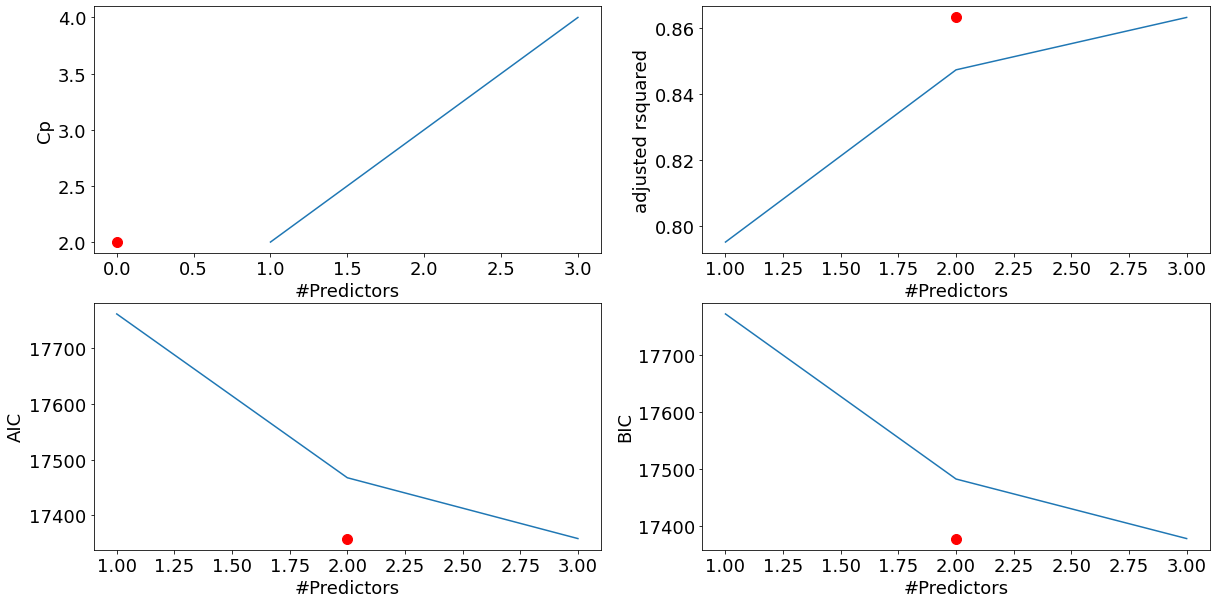

In [67]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18, 'lines.markersize':10})

# Mallow Cp
plt.subplot(2, 2, 1)
Cp = models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                                  fitted_full_model.mse_total)*(train_X.shape[0]-
                                   row[1].params.shape[0])/fitted_full_model.mse_total), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), 'or')
plt.xlabel('#Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2,2,2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), 'or')
plt.xlabel('#Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2,2,3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), 'or')
plt.xlabel('#Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2,2,4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), 'or')
plt.xlabel('#Predictors')
plt.ylabel('BIC')

### 전진선택법

In [74]:
# 전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors+[p]+['const']))
    # 데이터 프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료 시간
    print('Processed', models.shape[0], 'models on', len(predictors)+1, 'predictors in', (toc - tic))
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[0])
    return best_model


In [77]:
# 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=['AIC', 'model'])
    tie = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodels_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]['model'].model.exog_names
        Fmodels_before = Fmodels.loc[i]['AIC']
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print('Total elapsed time:', (toc - tic), 'seconds.')
    
    return(Fmodels['model'][len(Fmodels['model'])])

In [78]:
Forward_best_model = forward_model(X=train_X, y=train_y)

Processed 36 models on 1 predictors in 0.05593585968017578
Selected predictors: ['Mfg_Year', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8af10b2cd0>
Processed 35 models on 2 predictors in 0.02843308448791504
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8ad3793430>
Processed 34 models on 3 predictors in 0.02334308624267578
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8af10b2eb0>
Processed 33 models on 4 predictors in 0.022696971893310547
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b025d5610>
Processed 32 models on 5 predictors in 0.023021221160888672
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'cons

In [79]:
Forward_best_model.aic

16984.774398286438

In [80]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     411.5
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:56:06   Log-Likelihood:                -8467.4
No. Observations:                1005   AIC:                         1.698e+04
Df Residuals:                     980   BIC:                         1.711e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1107.2741    129.421      8.556      0.000     853.300    1361.248
Automatic_airco   2602.7539    182.767     14.241      0.000    2244.094    2961.413
HP                  23.3675      3.445      6.783      0.000      16.607      30.128
Weight               8.1859      1.284      6.374      0.000       5.666      10.706
KM                  -0.0156      0.001    -11.539      0.000      -0.018      -0.013
Powered_Windows    350.4832     90.223      3.885      0.000     173.431     527.536
Quarterly_Tax       11.4331      2.067      5.531      0.000       7.377      15.489
Sport_Model        358.2543     89.716      3.993      0.000     182.196     534.312
Guarantee_Period    54.6976     14.088      3.883      0.000      27.052      82.343
CNG              -5.547e+05   6.48e+04     -8.557      0.000   -6.82e+05   -4.27e+05
Mfr_Guarantee      226.7455     77.035      2.943      0.003      75.573     377.918
Tow_Bar           -202.3814     82.645     -2.449      0.015    -364.563     -40.200
BOVAG_Guarantee    414.0975    140.519      2.947      0.003     138.344     689.851
Age_08_04          -27.9441     10.865     -2.572      0.010     -49.265      -6.623
Backseat_Divider  -295.2919    122.998     -2.401      0.017    -536.661     -53.923
CD_Player          189.3305    103.747      1.825      0.068     -14.261     392.922
Airco              186.4276     93.045      2.004      0.045       3.837     369.018
Petrol           -5.529e+05   6.48e+04     -8.530      0.000    -6.8e+05   -4.26e+05
Metallic_Rim       216.0842     95.742      2.257      0.024      28.202     403.967
ABS               -238.0386    106.674     -2.231      0.026    -447.374     -28.704
Automatic          292.0397    164.245      1.778      0.076     -30.273     614.352
Doors               64.2447     42.177      1.523      0.128     -18.522     147.011
Boardcomputer     -193.9957    121.505     -1.597      0.111    -432.435      44.444
Radio_cassette    -164.3612    108.774     -1.511      0.131    -377.818      49.096
Diesel           -5.534e+05   6.48e+04     -8.541      0.000   -6.81e+05   -4.26e+05
const            -1.661e+06   1.94e+05     -8.543      0.000   -2.04e+06   -1.28e+06
==============================================================================
Omnibus:                      110.492   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              689.768
Skew:                           0.265   Prob(JB):                    1.66e-150
Kurtosis:                       7.024   Cond. No.                     1.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.54e-20. Thi

### 후진소거법

In [81]:
# 후진소거법(step=1)
def backward(X, y, predictors):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(predictors, len(predictors) - 1): # 각 변수 조합을 고려한 경우의 수
        results.append(processSubset(X=X, y=y, feature_set = list(combo)+['const']))
    models=pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index # AIC가 가장 낮은 모델
    toc = time.time() # 종료 시간
    print('Processed', models.shape[0], 'models on', len(predictors) - 1, 'predictors in', (toc - tic))
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:' ,best_model[0])
    return best_model

In [82]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=['AIC', 'model'], index = range(1, len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X, y, predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_X, y=train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors)-1] = Backward_result
        predictors = Bmodels.loc[len(predictors)-1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [k for k in predictors if k != 'const']
        
    toc = time.time()
    print('Total elapsed time:', (toc - tic), 'Seconds.')
    return(Bmodels['model'].dropna().iloc[0])

In [83]:
Backward_best_model = backward_model(X=train_X, y=train_y)

Processed 36 models on 35 predictors in 0.09491515159606934
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b0260ba60>
Processed 35 models on 34 predictors in 0.0790259838104248
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Ye

In [84]:
Backward_best_model.aic

16984.774398286427

In [85]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     411.5
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:06:12   Log-Likelihood:                -8467.4
No. Observations:                1005   AIC:                         1.698e+04
Df Residuals:                     980   BIC:                         1.711e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -238.0386    106.674     -2.231      0.026    -447.374     -28.704
Airco              186.4276     93.045      2.004      0.045       3.837     369.018
Automatic          292.0397    164.245      1.778      0.076     -30.273     614.352
Automatic_airco   2602.7539    182.767     14.241      0.000    2244.094    2961.413
BOVAG_Guarantee    414.0975    140.519      2.947      0.003     138.344     689.851
Backseat_Divider  -295.2919    122.998     -2.401      0.017    -536.661     -53.923
Boardcomputer     -193.9957    121.505     -1.597      0.111    -432.435      44.444
CD_Player          189.3305    103.747      1.825      0.068     -14.261     392.922
CNG              -1312.5042    377.591     -3.476      0.001   -2053.484    -571.525
Cylinders        -6.792e+05   2.27e+04    -29.865      0.000   -7.24e+05   -6.35e+05
Doors               64.2447     42.177      1.523      0.128     -18.522     147.011
Guarantee_Period    54.6976     14.088      3.883      0.000      27.052      82.343
HP                  23.3675      3.445      6.783      0.000      16.607      30.128
KM                  -0.0156      0.001    -11.539      0.000      -0.018      -0.013
Metallic_Rim       216.0842     95.742      2.257      0.024      28.202     403.967
Mfg_Month           27.9441     10.865      2.572      0.010       6.623      49.265
Mfg_Year          1442.6038     48.481     29.756      0.000    1347.466    1537.742
Mfr_Guarantee      226.7455     77.035      2.943      0.003      75.573     377.918
Petrol             477.5144    324.442      1.472      0.141    -159.167    1114.196
Powered_Windows    350.4832     90.223      3.885      0.000     173.431     527.536
Quarterly_Tax       11.4331      2.067      5.531      0.000       7.377      15.489
Radio_cassette    -164.3612    108.774     -1.511      0.131    -377.818      49.096
Sport_Model        358.2543     89.716      3.993      0.000     182.196     534.312
Tow_Bar           -202.3814     82.645     -2.449      0.015    -364.563     -40.200
Weight               8.1859      1.284      6.374      0.000       5.666      10.706
const            -1.698e+05   5685.565    -29.865      0.000   -1.81e+05   -1.59e+05
==============================================================================
Omnibus:                      110.492   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              689.768
Skew:                           0.265   Prob(JB):                    1.66e-150
Kurtosis:                       7.024   Cond. No.                     1.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.37e-20. Thi

### 단계적 선택법

In [86]:
def Stepwise_model(X, y):
    Stepmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X, y, predictors + ['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors = predictors)
        if Backward_result['AIC']<Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']>Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]['AIC']
    toc = time.time()
    print('Total elapsed time:', (toc-tic), 'seconds.')
    return(Stepmodels['model'][len(Stepmodels['model'])])

In [87]:
Stepwise_best_model=Stepwise_model(X=train_X, y=train_y)

Processed 36 models on 1 predictors in 0.04919028282165527
Selected predictors: ['Mfg_Year', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b026037f0>
forward
Processed 1 models on 0 predictors in 0.001928091049194336
Selected predictors: ['const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8ae0807a60>
Processed 35 models on 2 predictors in 0.029816150665283203
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b02603670>
forward
Processed 2 models on 1 predictors in 0.0025970935821533203
Selected predictors: ['Mfg_Year', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8ae08035e0>
Processed 34 models on 3 predictors in 0.025905847549438477
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper 

Processed 19 models on 18 predictors in 0.02002406120300293
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Sport_Model', 'Guarantee_Period', 'CNG', 'Mfr_Guarantee', 'Tow_Bar', 'BOVAG_Guarantee', 'Age_08_04', 'Backseat_Divider', 'CD_Player', 'Airco', 'Petrol', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b025e20a0>
forward
Processed 18 models on 17 predictors in 0.021806955337524414
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Sport_Model', 'Guarantee_Period', 'CNG', 'Mfr_Guarantee', 'Tow_Bar', 'BOVAG_Guarantee', 'Age_08_04', 'Backseat_Divider', 'Airco', 'Petrol', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b025e2b50>
Processed 18 models on 19 predictors in 0.023036956787109375
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windo

Processed 11 models on 26 predictors in 0.022562026977539062
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Sport_Model', 'Guarantee_Period', 'CNG', 'Mfr_Guarantee', 'Tow_Bar', 'BOVAG_Guarantee', 'Age_08_04', 'Backseat_Divider', 'CD_Player', 'Airco', 'Petrol', 'Metallic_Rim', 'ABS', 'Automatic', 'Doors', 'Boardcomputer', 'Radio_cassette', 'Diesel', 'Cylinders', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8ad408b670>
forward
Processed 26 models on 25 predictors in 0.04670906066894531
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Sport_Model', 'Guarantee_Period', 'CNG', 'Mfr_Guarantee', 'Tow_Bar', 'BOVAG_Guarantee', 'Age_08_04', 'Backseat_Divider', 'CD_Player', 'Airco', 'Petrol', 'Metallic_Rim', 'ABS', 'Automatic', 'Doors', 'Boardcomputer', 'Radio_cassette', 'Diesel', 'const'] AIC: <statsmodels.regression.linear_m

In [88]:
Stepwise_best_model.aic

16984.774398286438

### 성능평가

In [89]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(26,) (26,) (26,)


In [96]:
# 모델에 의해 예측된/추정된 값 <=> test_y
pred_y_full = fitted_full_model.predict(test_X)
pred_y_forward = Forward_best_model.predict(test_X[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_X[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_X[Stepwise_best_model.model.exog_names])

In [97]:
perf_mat = pd.DataFrame(columns =['All', 'Forward', 'Backward', 'Stepwise'],
                       index = ['MSE', 'RMSE', 'MAE', 'MAPE'])

In [98]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [103]:
# 성능지표
perf_mat.loc['MSE']['All'] = metrics.mean_squared_error(test_y, pred_y_full)
perf_mat.loc['MSE']['Forward'] = metrics.mean_squared_error(test_y, pred_y_forward)
perf_mat.loc['MSE']['Backward'] = metrics.mean_squared_error(test_y, pred_y_backward)
perf_mat.loc['MSE']['Stepwise'] = metrics.mean_squared_error(test_y, pred_y_stepwise)

perf_mat.loc['RMSE']['All'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['Forward'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['Backward'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['Stepwise'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['All'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['Forward'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['Backward'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['Stepwise'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['All'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['Forward'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['Backward'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['Stepwise'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              All     Forward    Backward    Stepwise
MSE   1.23616e+06  1.2353e+06  1.2353e+06  1.2353e+06
RMSE      1111.83     1111.44     1111.44     1111.44
MAE       824.945     824.302     824.302     824.302
MAPE      8.64382     8.64709     8.64709     8.64709


In [104]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
26
26
26


- parameter의 수가 굉장히 차이가 많이 남. 37 < = > 26
- 비슷한 성능이라면, parameter의 수가 더 적은 것이 best model이다.

### 정리
- 1) 데이터를 전처리
- 2) 모델에 fitting
- 3) R-square나 변수의 p-value를 보고 '이 모델이 성능이 어느정도 나오는구나'라는 것을 알 수 있고,
- 4) 변수에 대해서 확인 후 제거할 변수 판단. * 도메인 지식에 근거해서 해야함
- 5) 코디네이션 매트릭스나 VIF를 통해 다중공선성 확인하면서 '이 변수 역시 지울 필요 있다.' 인지할 것
            > 지울 변수가 1~2개라면 일일히 지워도 되겠지만, 갯수가 많다면 
            변수선택법 사용.
- 6) residual 확인하면서 '어느 정도 적합이 잘 된 모델이구나' 확인
- 7) validation_data에 대한 성능을 꼭 확인하고 모델 선택.